In [58]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
import collections
import math
import copy
sys.path.insert(0, '../ReSurfEMG')
import helper_functions as hf
from config import Config

In [59]:
emg_sample_rate = 999
from scipy.io import loadmat
mat = loadmat('out20.mat')
data_emg_samples = mat['out'][0]
data_emg_samples = np.array(data_emg_samples)
data_emg_samples

array([ 3.23324913,  9.57284571, 16.48626787, ..., -3.76026408,
       -2.04367553,  1.19183684])

In [60]:
start = input()

In [61]:
end = input()

In [62]:
time_view = 'Seconds'

In [63]:
if time_view == 'Seconds':
    start_s = int(float(start)* emg_sample_rate)
    end_s = min([int(float(end)*emg_sample_rate), len(data_emg_samples)-1])

else:
    start_s = int(float(start))
    end_s = min([int(float(end)), len(data_emg_samples)-1])
    y_emg = [range(len(data_emg_samples))]


In [64]:
y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples))]
y_emg = y_emg[start_s:end_s]

In [69]:
RMS_window_ms = 700
RMS_windows_samp = int(RMS_window_ms / 1000 *  emg_sample_rate)

RMS_data_emg_di = hf.full_rolling_rms(data_emg_samples, RMS_windows_samp)

In [70]:
processed_data_emg_di = RMS_data_emg_di[start_s:end_s]

In [71]:
processed_data_emg_di = processed_data_emg_di - np.mean(processed_data_emg_di)

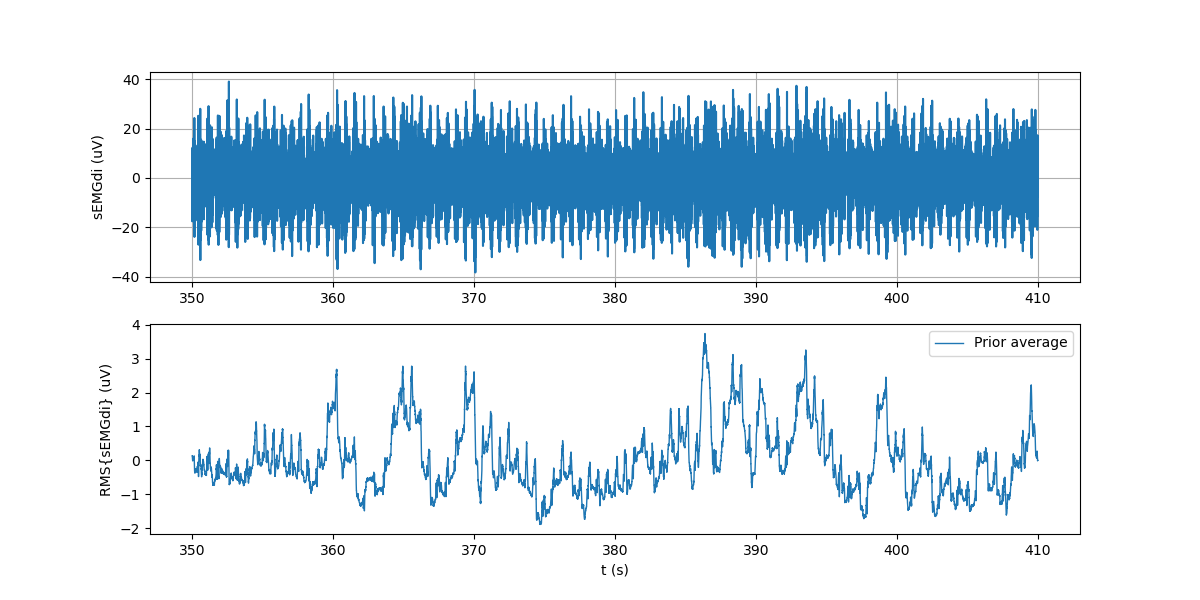

In [72]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg, data_emg_samples[start_s:end_s])
axis[0].set_ylabel('sEMGdi (uV)')

axis[1].plot(y_emg, processed_data_emg_di, linewidth=1)
axis[1].set_xlabel('t (s)')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].legend(['Prior average'])